<a href="https://colab.research.google.com/github/lingueeni/cifar10-prediction/blob/main/ann_vs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

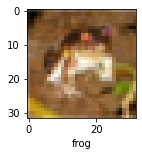

In [15]:
plot_sample(X_train,y_train,0)

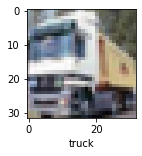

In [16]:
plot_sample(X_train,y_train,1)

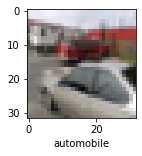

In [17]:
plot_sample(X_train,y_train,49999)

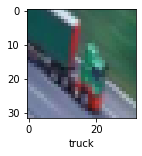

In [18]:
plot_sample(X_train,y_train,50)

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
artificial_neural_network = models.Sequential([
        layers.Flatten(input_shape = (32,32,3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')
        ])

artificial_neural_network.compile(optimizer = 'SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
artificial_neural_network.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 111s 69ms/step - loss: 1.8118 - accuracy: 0.3555
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6245 - accuracy: 0.4271
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5411 - accuracy: 0.4552
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4825 - accuracy: 0.4778
Epoch 5/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4309 - accuracy: 0.4985
Epoch 6/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3880 - accuracy: 0.5108
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3497 - accuracy: 0.5256
Epoch 8/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3152 - accuracy: 0.5404
Epoch 9/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.2803 - accuracy: 0.5512
Epoch 10/10
1563/1563 [==============================] 

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [25]:
y_predict = artificial_neural_network.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_predict]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.54      0.58      1000
           1       0.63      0.69      0.66      1000
           2       0.53      0.21      0.31      1000
           3       0.26      0.68      0.38      1000
           4       0.44      0.47      0.46      1000
           5       0.55      0.14      0.22      1000
           6       0.55      0.60      0.57      1000
           7       0.66      0.49      0.56      1000
           8       0.67      0.62      0.65      1000
           9       0.57      0.59      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.55      0.50      0.50     10000
weighted avg       0.55      0.50      0.50     10000



In [26]:
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [27]:
convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train,y_train,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4375 - accuracy: 0.4851
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0805 - accuracy: 0.6187
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9555 - accuracy: 0.6690
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8682 - accuracy: 0.7014
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8016 - accuracy: 0.7207
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7429 - accuracy: 0.7412
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6902 - accuracy: 0.7594
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6492 - accuracy: 0.7713
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6119 - accuracy: 0.7859
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [28]:
convolutional_neural_network.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9549 - accuracy: 0.6951


[0.9548604488372803, 0.6951000094413757]

In [29]:
artificial_neural_network.predict(X_test)

313/313 [==============================] - 9s 27ms/step


array([[1.6908647e-02, 2.4997270e-02, 7.6864801e-02, ..., 5.1790656e-04,
        2.4229668e-02, 8.4563985e-04],
       [1.7565498e-02, 3.0937272e-01, 5.9857185e-04, ..., 7.0461996e-05,
        2.1999259e-01, 4.4986150e-01],
       [3.5246629e-01, 1.7187028e-01, 4.5186491e-03, ..., 1.9518543e-03,
        2.7331892e-01, 1.8464777e-01],
       ...,
       [1.5713925e-03, 3.2494465e-04, 1.8385622e-01, ..., 9.5860604e-03,
        1.4119766e-02, 2.0079277e-03],
       [1.1436028e-02, 3.1956498e-02, 8.2054675e-02, ..., 1.6117707e-02,
        5.1623518e-03, 8.3823092e-03],
       [3.6513373e-02, 6.6120657e-03, 9.5687889e-02, ..., 3.4101501e-01,
        4.1870004e-03, 1.7979220e-02]], dtype=float32)

In [30]:
convolutional_neural_network.predict(X_test)

313/313 [==============================] - 5s 15ms/step


array([[9.67393105e-04, 4.44933103e-05, 1.13260699e-03, ...,
        5.83332530e-06, 1.47720166e-02, 3.01650562e-05],
       [9.91399679e-03, 5.97297773e-03, 1.34676566e-05, ...,
        9.38623845e-09, 9.83774602e-01, 3.20787309e-04],
       [7.62972176e-01, 1.12841815e-01, 5.39779523e-03, ...,
        6.53942209e-03, 4.20815423e-02, 6.82308003e-02],
       ...,
       [4.30784967e-05, 3.63623735e-06, 5.00764623e-02, ...,
        1.40569601e-02, 6.34338940e-04, 2.58286920e-04],
       [6.20404541e-01, 4.21582647e-02, 1.36700156e-03, ...,
        2.53031849e-05, 1.31971717e-07, 2.83666537e-04],
       [1.74250490e-05, 3.57976013e-08, 1.50735514e-05, ...,
        9.70858395e-01, 1.59128053e-08, 2.03009023e-07]], dtype=float32)

In [31]:
y_pred = convolutional_neural_network.predict(X_test)
y_pred[:5]


313/313 [==============================] - 5s 16ms/step


array([[9.67393105e-04, 4.44933103e-05, 1.13260699e-03, 9.32197094e-01,
        7.49388942e-04, 4.92710434e-02, 8.30040779e-04, 5.83332530e-06,
        1.47720166e-02, 3.01650562e-05],
       [9.91399679e-03, 5.97297773e-03, 1.34676566e-05, 3.71795204e-06,
        2.66454464e-07, 1.48197074e-07, 5.31253619e-08, 9.38623845e-09,
        9.83774602e-01, 3.20787309e-04],
       [7.62972176e-01, 1.12841815e-01, 5.39779523e-03, 7.43615965e-04,
        8.49180622e-04, 1.83951255e-04, 1.59700474e-04, 6.53942209e-03,
        4.20815423e-02, 6.82308003e-02],
       [8.89518917e-01, 4.04704595e-03, 3.81601299e-03, 6.04598783e-04,
        1.27796782e-03, 1.84899982e-05, 3.65176202e-05, 1.40869961e-04,
        1.00157641e-01, 3.81946069e-04],
       [6.61488784e-08, 3.88744229e-06, 9.24830092e-04, 1.34697305e-02,
        6.97727948e-02, 1.00828358e-03, 9.14819479e-01, 1.83830835e-07,
        4.95047061e-07, 2.21611245e-07]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]


In [33]:
y_classes[:5]

[3, 8, 0, 0, 6]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

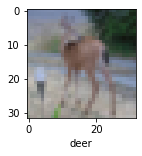

In [44]:
plot_sample(X_test, y_test,100)

In [43]:
classes[y_classes[100]]

'deer'